# Heart Disease Prediction🫀🤒 using Neural Networks📈📊

This notebook will focus on **predicting heart disease** using neural networks. The dataset used in this notebook has 918 samples across 12 attributes. Attributes include age, gender, chest pain type, cholesterol,...

The goal of this notebook is to build a simple neural network to predict heart disease using Keras (with TensorFlow as the backend) as well as EDA and Data preprocessing. There will be some common Python libraries used, such as pandas, numpy, and matplotlib. Additionally, we will use sklearn and keras for the machine learning part of this project. Use the cells below to import these libraries and make sure they're installed correctly.

## Import libraries and read data 📚 🛠

In [29]:
%matplotlib inline

import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import *
from keras import regularizers
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

In [2]:
# read the csv file

dataset = pd.read_csv('./heart.csv')

In [3]:
# print the shape of the DataFrame

print('Shape of DataFrame:', dataset.shape)
print(f'There are {dataset.shape[0]} samples in {dataset.shape[1]} attributes in the dataset.')

Shape of DataFrame: (918, 12)
There are 918 samples in 12 attributes in the dataset.


Our dataset is a csv file format with 12 features, one of which is our target(HeartDesease) and the rest are the features. Our dataset looks like this.

In [4]:
# dataset's first 7 samples

dataset.head(7)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0


## EDA and Data Preprocessing 🎨 🎬

Information about our dataset is available here, such as data types and number of null samples. We don't have any null samples in our dataset, but we have some "object" data types that need to be handled later.

In [5]:
# datasets information

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


The describe() method returns description of the numerical data in the DataFrame. We can see here, for example, that the average age in our dataset is 53.51 years old or nearly 55% of the people in the dataset have heart disease.

In [6]:
# description of the numerical data

dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


I checked for null values here, and hopefully none were found. Whenever our dataset has any null values, we need to either drop them or set a value for them.

In [7]:
# Check for null values

dataset.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

A balanced dataset is a dataset where each output class (or target class) is represented by the same number of input samples. If we have an imbalanced dataset we will lose valuable information from the sample. Therefore, it is a good idea to check if the dataset is balanced before moving forward.

In [8]:
# Check to see if the dataset is balanced

print(dataset['HeartDisease'].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


In [9]:
# The percentage of people belonging to different classes

print(dataset['HeartDisease'].value_counts(normalize=True) * 100)

1    55.337691
0    44.662309
Name: HeartDisease, dtype: float64


Because the dataset appears to be balanced, we will not perform any up or down sampling.

What percentage of the people in this dataset are men and what percentage are women?
First I created two variables called male and female and counted the number of "male" and "female" in our dataset to assign the number to these variables. Then I used a pie chart to visualize the percent of males and females in the dataset. As you can see, almost 79% of people in this dataset are male.

We have 725 men and 193 women in our dataset.


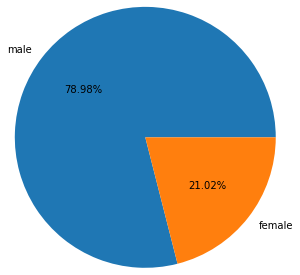

In [10]:
# percentage of men and women in the dataset

male = dataset.Sex[dataset.Sex == 'M'].count()
female = dataset.Sex[dataset.Sex == 'F'].count()
print(f'We have {male} men and {female} women in our dataset.')

data = [male, female]
labels = ['male', 'female']

plt.pie(data, labels=labels, radius = 1.5, autopct = "%0.2f%%")
plt.show()

The catplot represents the different types of chest pain among the people in our samples. We can see that men are more likely to suffer from chest pain than women.Additionally, having "ASY" chest pain means we are more likely to have a heart problem.

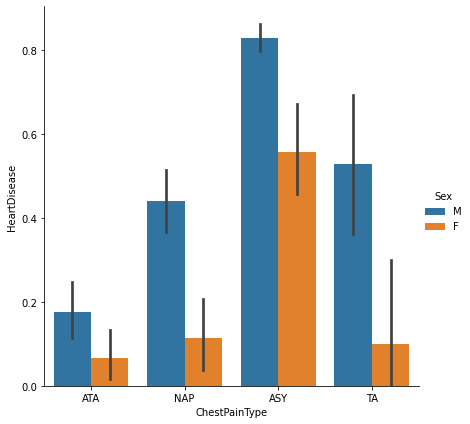

In [11]:
# different types of chest pain

sns.catplot(data=dataset, x='ChestPainType', y='HeartDisease', hue='Sex', kind="bar", height=6)

The chart below illustrates the impact of having colestroles on having a heart condition.

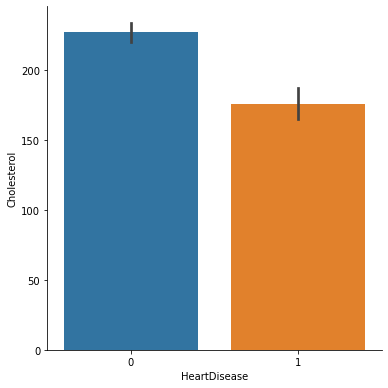

In [12]:
# impact of having colestroles

sns.catplot(data=dataset, x='HeartDisease', y='Cholesterol', kind="bar", height=5.5)

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.

/var/folders/rg/tdyflbyd2l55vz5v0cf_pqdr0000gn/T/ipykernel_7494/322348381.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


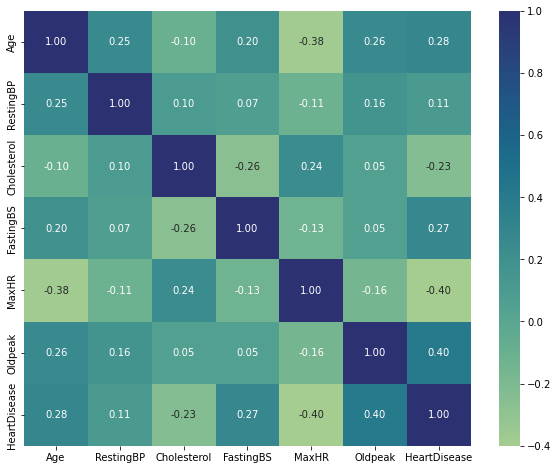

In [13]:
# correlation matrix

correlation = dataset.corr()

plt = plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap=sns.color_palette("crest", as_cmap=True))
plt.show()

Our understanding of the dataset is good at this point, and we plotted some plots to gain a better understanding of it. The data should be preprocessed to prepare it for giving as input to our model before training it and making predictions.

I'll start the data preprocessing with seperating datasets label from other features. Here we have X that is a DataFrame and consists of dataset features(except the label) and we have y, a pandas Series and it contains our datasets label(HeartDisease).

In [14]:
# seperating datasets label from other features

X = dataset.drop('HeartDisease', axis=1)
y = dataset['HeartDisease']

As you can see "X" is pandas DataFrame with shape of (918, 11). You can also see the first 5 samples of the DataFrame in the code below.

In [15]:
print(f'X is: {type(X)}')
print(f'Shape of X: {X.shape}')
X.head()

X is: <class 'pandas.core.frame.DataFrame'>
Shape of X: (918, 11)


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


"y" is pandas Series with shape of (918, ) and you can see the first 5 values of it down here.

In [16]:
# y is datasets target

print(f'y is: {type(y)}')
print(f'Shape of y: {y.shape}')
y.head()

y is: <class 'pandas.core.series.Series'>
Shape of y: (918,)


0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

As you saw earlier in this notebook i used "dataset.info()" and we had some categorical data types in our dataset. Now it's time to handel them.
I'll use pandas get_dummies() to one-hot encode the categorical data.(get_dummies() is used for data manipulation. It converts categorical data into dummy or indicator variables.)

In [17]:
# encode the categorical data

X = pd.get_dummies(X)

print(f'Shape of X: {X.shape}')
X.head()

Shape of X: (918, 20)


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


I will use Sklearn's train_test_split() function to generate a training dataset (80 percent of the total data) and testing dataset (20 percent of the total data).

In [18]:
# split data into train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (734, 20)
Shape of X_test: (184, 20)
Shape of y_train: (734,)
Shape of y_test: (184,)


"X_train" and "X_test" are pandas DataFrame and we can't use them as an input for our NN model. I'll change their types to "numpy arrays" and also change their data types to 'float32'.

In [19]:
X_train = X_train.to_numpy().astype('float32')
X_test = X_test.to_numpy().astype('float32')

In [20]:
# first item of X_train ndarray

print(X_train[0])


# X_train and X_test data types

print(f'Type of X_train is: {type(X_train)}')
print(f'Type of X_test is: {type(X_test)}')

[ 42.  120.  240.    1.  194.    0.8   0.    1.    0.    0.    1.    0.
   0.    1.    0.    1.    0.    1.    0.    0. ]
Type of X_train is: <class 'numpy.ndarray'>
Type of X_test is: <class 'numpy.ndarray'>


Scaling the data makes it easy for a model to learn and understand the problem. To scale the data i'll use StandardScaler().It removes the mean and scales each feature/variable to unit variance.

In [21]:
# scale X_train and X_test

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# first item of X_train after scaling

print(X_train[0])

[-1.2450672  -0.70898545  0.372803    1.8426095   2.2843528  -0.09706108
 -0.54060477  0.54060477 -1.0973624  -0.48333576  1.8790594  -0.2135042
 -0.50467896  0.80817896 -0.4876208   0.8384606  -0.8384606   3.780432
 -1.0332501  -0.8479207 ]


To convert our labels that are integers to binary class matrix i'll user keras to_categorical() function.

In [22]:
# convert the data to categorical labels

y_train = to_categorical(y_train)

print (y_train.shape)
y_train

(734, 2)


array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## Train Model 🥊 ⚙️

For building the NN model I will be using keras Sequential class to create a 5 layer model(3 hidden layers and 2 input and output layers) with adam as the optimizer.

In [23]:
def create_model():
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(20, ), kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)))
    model.add(Dense(12, activation='relu', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='relu', kernel_regularizer=regularizers.L1L2(l1=0.001, l2=0.001)))
    model.add(Dropout(0.2))
    model.add(Dense(2, activation='sigmoid'))
    return model

model = create_model()
model.summary()

2022-06-08 22:20:09.581234: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-08 22:20:09.581334: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 12)                204       
                                                                 
 dropout (Dropout)           (None, 12)                0         
                                                                 
 dense_2 (Dense)             (None, 8)                 104       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 2)                 18        
                                                                 
Total params: 662
Trainabl

In [24]:
opt = Adam(lr=0.001)

model.compile(
    loss='binary_crossentropy',
    optimizer=opt,
    metrics=['accuracy']
)

/Users/parisa/opt/anaconda3/envs/Heart-Disease-Prediction-env/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [25]:
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.2)

Epoch 1/40


2022-06-08 22:20:09.708225: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


 1/19 [>.............................] - ETA: 7s - loss: 1.1256 - accuracy: 0.3438

2022-06-08 22:20:09.966481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 1s 19ms/step - loss: 0.9252 - accuracy: 0.5196 - val_loss: 0.8514 - val_accuracy: 0.6190
Epoch 2/40
17/19 [=========================>....] - ETA: 0s - loss: 0.8356 - accuracy: 0.5772

2022-06-08 22:20:10.398315: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


19/19 [==============================] - 0s 8ms/step - loss: 0.8279 - accuracy: 0.5894 - val_loss: 0.8020 - val_accuracy: 0.7279
Epoch 3/40
19/19 [==============================] - 0s 9ms/step - loss: 0.8053 - accuracy: 0.6491 - val_loss: 0.7690 - val_accuracy: 0.7483
Epoch 4/40
19/19 [==============================] - 0s 9ms/step - loss: 0.7546 - accuracy: 0.7087 - val_loss: 0.7432 - val_accuracy: 0.7891
Epoch 5/40
19/19 [==============================] - 0s 9ms/step - loss: 0.7415 - accuracy: 0.7376 - val_loss: 0.7201 - val_accuracy: 0.8163
Epoch 6/40
19/19 [==============================] - 0s 9ms/step - loss: 0.7179 - accuracy: 0.7496 - val_loss: 0.6967 - val_accuracy: 0.8163
Epoch 7/40
19/19 [==============================] - 0s 9ms/step - loss: 0.6713 - accuracy: 0.7751 - val_loss: 0.6712 - val_accuracy: 0.8299
Epoch 8/40
19/19 [==============================] - 0s 9ms/step - loss: 0.6456 - accuracy: 0.7819 - val_loss: 0.6426 - val_accuracy: 0.8367
Epoch 9/40
19/19 [=============

Here are losses and accuracy performance measuer of the model for training and validation data.

In [26]:
model_history = pd.DataFrame(history.history)
model_history

,loss,accuracy,val_loss,val_accuracy
0,0.925216,0.519591,0.851424,0.619048
1,0.827851,0.589438,0.801970,0.727891
2,0.805329,0.649063,0.768959,0.748299
3,0.754650,0.708688,0.743156,0.789116
4,0.741536,0.737649,0.720062,0.816326
5,0.717939,0.749574,0.696687,0.816326
6,0.671286,0.775128,0.671152,0.829932
7,0.645550,0.781942,0.642598,0.836735
8,0.618220,0.827939,0.617888,0.836735
9,0.611453,0.804089,0.592370,0.836735


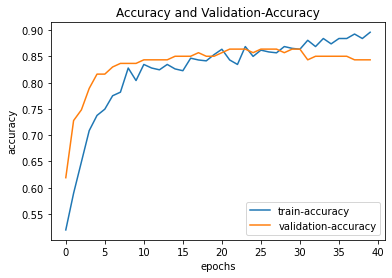

In [30]:
# model accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy and Validation-Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train-accuracy', 'validation-accuracy'])
plt.show()

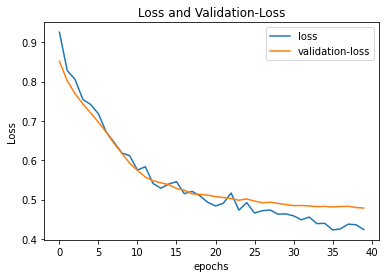

In [31]:
# model Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss and Validation-Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['loss', 'validation-loss'])
plt.show()

## Test and save model ✅ 🎯

We saw the accuracy results are for the training data, but what about the testing dataset? If our model's cannot generalize to data that wasn't used to train them, they won't provide any utility.
I'll first make predictions using my model on test data and then calculate it's performance using Sklearn metrics.

In [32]:
prediction = np.argmax(model.predict(X_test), axis=1)

6/6 [==============================] - 0s 4ms/step


2022-06-08 22:20:53.740412: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [33]:
accuracy_score = accuracy_score(y_test, prediction) * 100
print(f'Accuracy Score is: {accuracy_score:.2f}')

Accuracy Score is: 87.50


In [34]:
classification_report = classification_report(y_test, prediction)
print(classification_report)

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [35]:
model.save('model.h5')